In [1]:
import numpy as np
import pandas as pd
import logging
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Constants
from lib.mmsbm import MMSBM

train = "train.csv"
test = "test.csv"
sampling = 6
# Number of groups of users
k = 4
# Number of groups of items
l = 7
# Iterations
# To plateau the coefficients the minimum is 600
iterations = 400

In [7]:
mmsbm = MMSBM(
    train_set=train,
    test_set=test,
    user_groups=k,
    item_groups=l,
    iterations=iterations,
    sampling=sampling,
    seed=1714,
    notebook=True
)
return_dict = mmsbm.process()
s_prs, accuracy, mae, s2, s2pond, rat, lkh, theta, eta = mmsbm.postprocess(return_dict)

INFO:MMSBM:Running 6 runs of 400 iterations.
INFO:MMSBM:Done 6 runs in 4.25 minutes.
INFO:MMSBM:We had an accuracy of 0.36614926642568574, a MAE of 0.6604295130767595 and s2 and weighted s2 of 4860 and 4267.


In [8]:
logger = logging.getLogger()
logger.setLevel(level=logging.INFO)

In [9]:
temp = np.array(s_prs[0])
ev = pd.DataFrame(temp.reshape((temp.shape[0], temp.shape[1] * temp.shape[2] * temp.shape[3])))
ev["iteration"] = ev.index + 1
ev = ev.melt(id_vars="iteration", value_vars=list(ev.columns[:-1]))

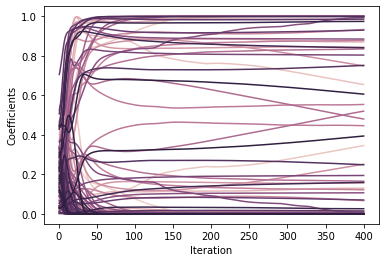

In [10]:
g = sns.lineplot(x="iteration", y="value", hue="variable", data=ev)
g.set(xlabel='Iteration', ylabel='Coefficients')
g.legend_.remove()

<AxesSubplot:>

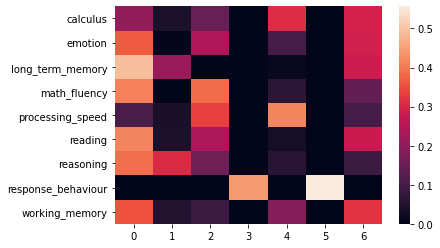

In [12]:
# Groups of tests
deta = pd.DataFrame(eta[0])
deta = deta.drop([0], axis=0)
areas = {
    1: "calculus",
    2: "emotion",
    3: "long_term_memory",
    4: "math_fluency",
    5: "processing_speed",
    6: "reading",
    7: "reasoning",
    8: "response_behaviour",
    9: "working_memory"
}
deta.index = areas.values()
sns.heatmap(deta)

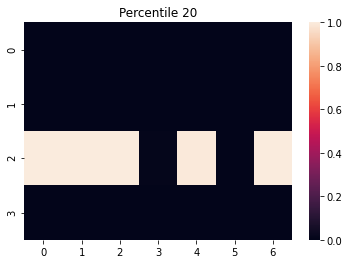

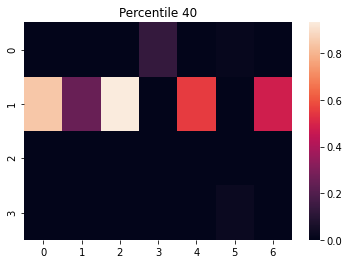

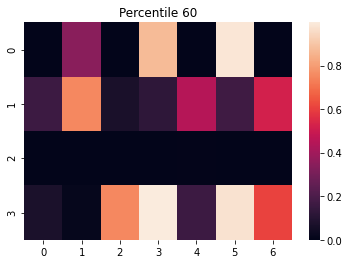

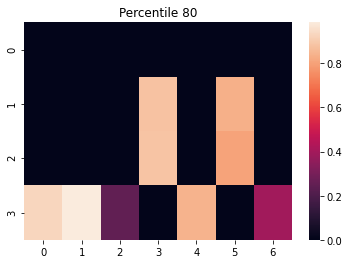

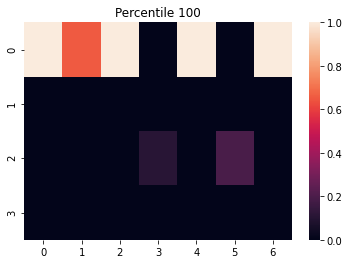

In [11]:
# Probability distributions
prs = s_prs[0][-1]
for i in range(prs.shape[2]):
    ax = plt.axes()
    sns.heatmap(prs[:, :, i], ax = ax)

    ax.set_title(f"Percentile {(i + 1) * 20}")
    plt.show()

In [13]:
# Observations belonging to groups
dtheta = pd.DataFrame(theta[0])

<AxesSubplot:>

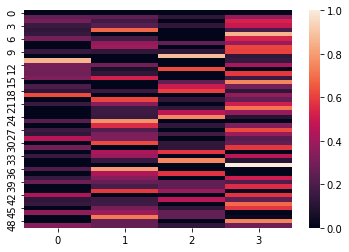

In [15]:
sns.heatmap(dtheta.iloc[:50, :])

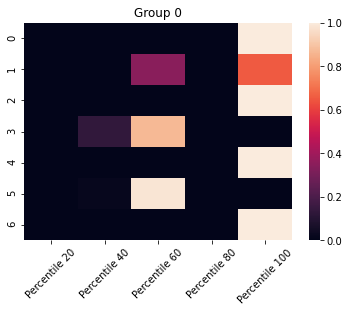

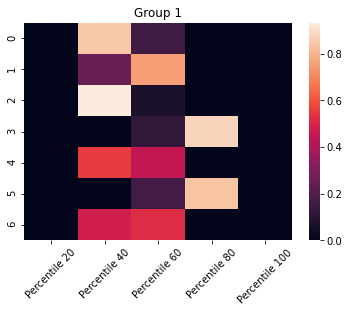

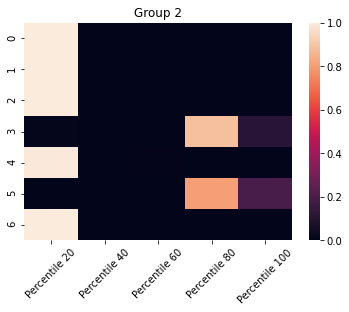

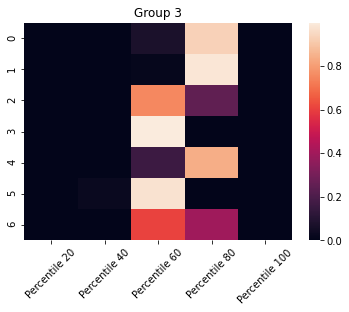

In [23]:
# Let's try to understand the four groups better
for i in range(prs.shape[0]):
    ax = plt.axes()
    sns.heatmap(prs[i, :, :], ax = ax)
    ax.set_xticklabels([f"Percentile {(a + 1) * 20}" for a in range(5)])
    plt.xticks(rotation=45)

    ax.set_title(f"User group {i}")
    plt.show()

In [19]:
prs.shape

(4, 7, 5)

coses a fer:
- mirar que les normalitzacions estiguin bé
- venetian blinds test set i accuracy com déu mana
- trobar millors k i l
- 5-fold CV per calcular l'accuracy
- random forest per comparar: tant amb valors reals com amb percentils
- percentil real vs predit per prova

- mirar doctorat industrial

In [ ]:
# Output stuff
deta.to_csv("eta.csv")
dtheta.to_csv("theta.csv")
for i in range(prs.shape[2]):
    pd.DataFrame(prs[:, :, i]).to_csv(f"prs_{i}.csv")